# Getting Started with Analyzing FRED data in Python

In [1]:
import pandas_datareader as web
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

/Users/pauldesalvo/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start = datetime(2010,1,1)
end = datetime(2030,1,1)

In [3]:
SP500 = web.DataReader('SP500','fred',start,end)

I'm going to use the seaborn library because the charts look a little nicer by default than using matplotlib.

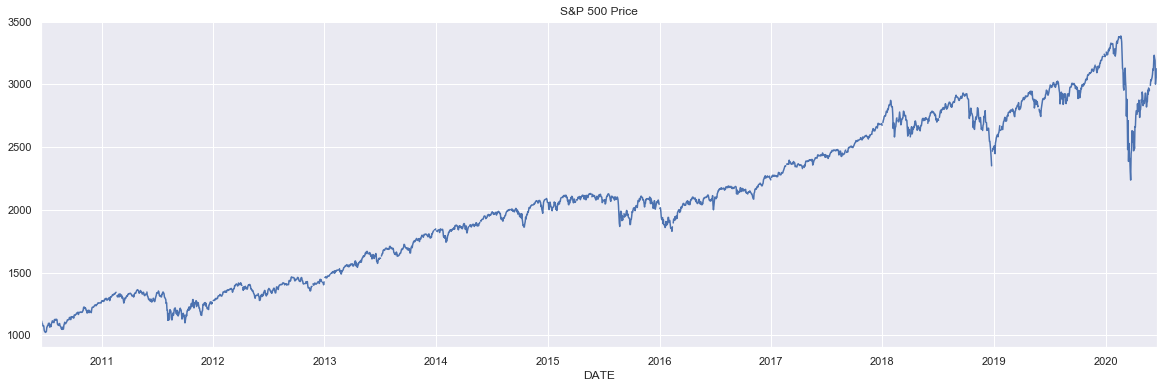

In [4]:
sns.set() #run this to overide matplotlib
SP500['SP500'].plot(title='S&P 500 Price',figsize=(20, 6))

#Use the below to save the chart as an image file
plt.savefig('s&p500.png')

If you want to calculate the daily change from yesterday's close, you will need to have the previous day's numbers on the same row as the current days. To do that, you have to create a new column where the rows are all shifted up by one. This code creates a new column that does the following:

In [5]:
#This code moves rows up one to have yesterdays close and the current days close in the same row. Than takes the difference to calculate a percent chagne
SP500['daily_return'] = (SP500['SP500']/ SP500['SP500'].shift(1)) -1

In [6]:
# This allows you to see all the rows instead of just a preview
pd.set_option('display.max_rows',None)


In [7]:
SP500.sort_index(ascending=False, inplace=True)
print(SP500)

              SP500  daily_return
DATE                             
2020-06-17  3113.49     -0.003600
2020-06-16  3124.74      0.018962
2020-06-15  3066.59      0.008312
2020-06-12  3041.31      0.013061
2020-06-11  3002.10     -0.058944
2020-06-10  3190.14     -0.005313
2020-06-09  3207.18     -0.007799
2020-06-08  3232.39      0.012042
2020-06-05  3193.93      0.026212
2020-06-04  3112.35     -0.003369
2020-06-03  3122.87      0.013649
2020-06-02  3080.82      0.008211
2020-06-01  3055.73      0.003751
2020-05-29  3044.31      0.004812
2020-05-28  3029.73     -0.002108
2020-05-27  3036.13      0.014827
2020-05-26  2991.77           NaN
2020-05-25      NaN           NaN
2020-05-22  2955.45      0.002354
2020-05-21  2948.51     -0.007774
2020-05-20  2971.61      0.016651
2020-05-19  2922.94     -0.010484
2020-05-18  2953.91      0.031501
2020-05-15  2863.70      0.003926
2020-05-14  2852.50      0.011525
2020-05-13  2820.00     -0.017463
2020-05-12  2870.12     -0.020544
2020-05-11  29

To plot more than one series on the same chart, simply pass in a list of the data series

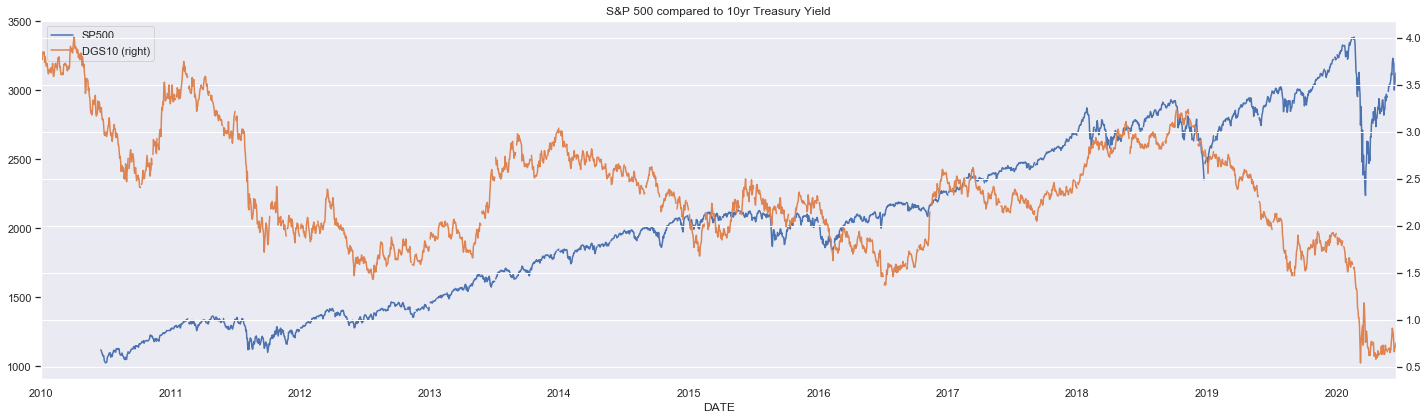

In [15]:
SP500_10yrtreasury = web.DataReader(['SP500',"DGS10"],'fred',start,end)
SP500_10yrtreasury.plot(title = 'S&P 500 compared to 10yr Treasury Yield', secondary_y = "DGS10", figsize=(20, 6))
plt.tight_layout()

plt.savefig('s&p500and10yr.png')
plt.show()